# Musterlösung

In [1]:
from sympy import *
x = symbols('x', real=True)

### Aufgabe 1

Differenzieren Sie folgende rationale Funktion:

$$f(x)=\frac{x^2+1}{x-x^3}$$

Quotientenregel anwenden:

$$f'(x)=\frac{2x(x-x^3)-(1-3x^2)(x^2+1)}{(x-x^3)^2}$$

Zähler ausmultiplizieren:

$$f'(x)=\frac{2x^2-2x^4-x^2+3x^4-1+3x^2}{(x-x^3)^2}$$

Zähler vereinfachen:

$$f'(x)=\frac{x^4+4x^2-1}{(x-x^3)^2}$$

evtl. im Nenner herausheben:

$$f'(x)=\frac{x^4+4x^2-1}{x^2(x^2-1)^2}$$

In [4]:
diff((x**2+1)/(x-x**3),x).simplify()

(x**4 + 4*x**2 - 1)/(x**6 - 2*x**4 + x**2)

In [5]:
diff((x**2+1)/(x-x**3),x).factor()

(x**4 + 4*x**2 - 1)/(x**2*(x - 1)**2*(x + 1)**2)

### Aufgabe 2

Berechnen Sie $y'$ durch implizite Differentiation:

$$x^3y-y^3x=1$$

$$
    3x^2y + x^3y' - 3y^2y'x - y^3 = 0 \\
    y'(x^3-3y^2x) = y^3-3x^2y \\
    y' = \frac{y^3-3x^2y}{x^3-3y^2x} \\
    y' = \frac{y(y^2-3x^2)}{x(x^2-3y^2)} \\
$$    

In [4]:
y = Function('y')(x)
f = x**3*y - y**3*x - 1
f.diff(x)

x**3*Derivative(y(x), x) + 3*x**2*y(x) - 3*x*y(x)**2*Derivative(y(x), x) - y(x)**3

In [5]:
solveset(f.diff(x),y.diff(x))

FiniteSet((-3*x**2 + y(x)**2)*y(x)/(x*(x**2 - 3*y(x)**2)))

### Aufgabe 3

Es sei $f(t)=\left( \begin{array}{c}
 t\cos{t} \\
 t\sin{t} \\
 t^2
  \end{array} \right)$. 
  
Plotten Sie die Funktion. 
  
Bestimmen Sie $\frac{df(t)}{dt}$ und $\|\frac{df(t)}{dt}\|$. 

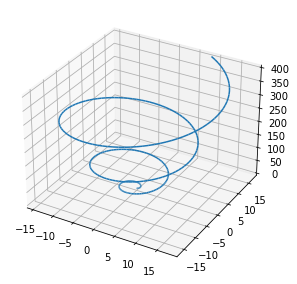

In [6]:
t=symbols('t', positive=True)
plotting.plot3d_parametric_line(t*cos(t), t*sin(t), t**2, (t, 0, 20))

$$\frac{df(t)}{dt}=\left( \begin{array}{c}
     \cos{t} -t\sin{t}\\
     \sin{t} + t\cos{t} \\
     2t
 \end{array} \right)$$

$$ \left\| \frac{df(t)}{dt} \right\| = 
    \sqrt{\cos^2{t}-2t\cos{t}\sin{t}+t^2\sin^2{t} + \sin^2{t} + 2t\sin{t}\cos{t} + t^2\cos^2{t} +4t^2} = \sqrt{1+5t^2} $$

In [7]:
from sympy.vector import *
R = CoordSys3D('R')
f = t*cos(t)*R.i + t*sin(t)*R.j + t**2*R.k; f

(t*cos(t))*R.i + (t*sin(t))*R.j + t**2*R.k

In [8]:
f.diff(t)

(-t*sin(t) + cos(t))*R.i + (t*cos(t) + sin(t))*R.j + 2*t*R.k

In [9]:
f.diff(t).magnitude().simplify()

sqrt(5*t**2 + 1)

### Aufgabe 4

Bestimmen Sie folgenden Grenzwert:

$$\lim_{x \rightarrow 0}\sin{x}\log{x} $$

Plotten Sie die Funktion.

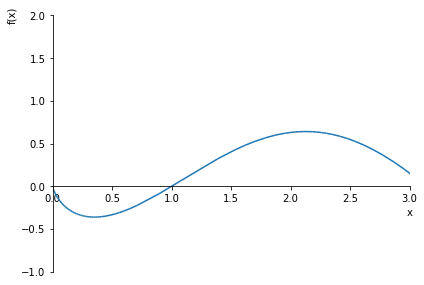

In [10]:
f = sin(x)*log(x)
plot(f,xlim=(0,3), ylim=(-1,2))

Regel von de L’Hospital:

$$
    \lim_{x \rightarrow 0}\sin{x}\log{x} 
    = \lim_{x \rightarrow 0} \frac{\log{x}}{\frac{1}{\sin{x}}} \\
    = \lim_{x \rightarrow 0} \frac{\frac{1}{x}}{-\frac{\cos{x}}{\sin^2{x}}} 
    = \lim_{x \rightarrow 0} -\frac{\sin^2{x}}{x\cos{x}} 
    = \lim_{x \rightarrow 0} -\frac{\sin{x}\tan{x}}{x} \\
    = \lim_{x \rightarrow 0} -\cos{x}\tan{x} - \sin{x}(1+\tan^2{x}) = 0
$$

In [11]:
f.limit(x,0)

0

### Aufgabe 5

Entwickeln Sie die Funktion $f(x)=\cosh{x}\log{(x+1)}$ in eine Taylorreihe um den Nullpunkt bis zum Glied 3. Ordnung.

Plotten Sie die Funktion und die Taylorreihe.

$$
    f'(x) = \sinh{x}\log{(x+1)} + \frac{\cosh{x}}{x+1} \\
    f''(x) = \cosh{x}\log{(x+1)} + \frac{\sinh{x}}{x+1} + \frac{\sinh{x}(x+1) - \cosh{x}}{(x+1)^2} \\
    = \cosh{x}\log{(x+1)} + 2\frac{\sinh{x}}{x+1} - \frac{\cosh{x}}{(x+1)^2} \\
    f'''(x) = \sinh{x}\log{(x+1)} + \frac{\cosh{x}}{x+1} + 2\frac{\cosh{x}(x+1) - \sinh{x}}{(x+1)^2} -
    \frac{\sinh{x}(x+1)^2 - 2\cosh{x}(x+1)}{(x+1)^4} \\
    = \sinh{x}\log{(x+1)} + 3\frac{\cosh{x}}{x+1} -3 \frac{\sinh{x}}{(x+1)^2}
    + 2\frac{\cosh{x}}{(x+1)^3} \\
    f(0) = 0, f'(0) = 1, f''(0) = -1, f'''(0) = 5 \\
    f(x) \approx x - \frac{x^2}{2} + \frac{5x^3}{6}
$$

In [12]:
f = cosh(x)*log(x+1)
t = f.series(x,0,4).removeO(); t

5*x**3/6 - x**2/2 + x

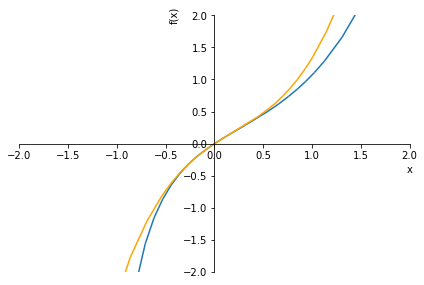

In [13]:
p1 = plot(f, xlim=(-2,2), ylim=(-2,2), show=False)
p1.extend(plot(t,xlim=(-2,2), ylim=(-2,2), line_color='orange', show=False))
p1.show()

### Aufgabe 6

Berechnen Sie mittels partieller Integration:

$$
\int {x\cosh{x}dx}
$$

$$
\int u dv = uv - \int v du \\
u = x, du = dx \\
dv = \cosh{x}, v = \sinh{x} + C \\
\int {x\cosh{x}dx} = x\sinh{x} - \int {\sinh{x}dx} + C  \\
= x\sinh{x} - \cosh{x} + C \\
$$

In [14]:
i = Integral(x*cosh(x),x);i

Integral(x*cosh(x), x)

In [15]:
i.doit()

x*sinh(x) - cosh(x)

### Aufgabe 7

Berechnen Sie die Fläche zwischen den Funktionen $f$ und $g$ im
Bereich zwischen den reellwertigen Schnittpunkten beider
Funktionen im Intervall $(0,2\pi)$. 

$$
f(x)=\sin{x},g(x)=\cos{x}
$$

Plotten Sie die beiden Funktionen.

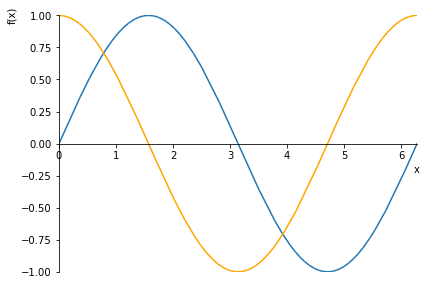

In [16]:
f = sin(x)
g = cos(x)
p1 = plot(f, xlim = (0,2*pi), ylim = (-1,1), show=False)
p1.extend(plot(g, line_color = 'orange', show=False))
p1.show()

$$ 
    \int_{\pi/4}^{5\pi/4} {\left( \sin{x} - \cos{x} \right) dx} 
    = -\cos{x} - \sin{x} \bigg|_{\pi/4}^{5\pi/4}
    = \frac{\sqrt{2}}{2} + \frac{\sqrt{2}}{2} + \frac{\sqrt{2}}{2} + \frac{\sqrt{2}}{2}
    = 4\frac{\sqrt{2}}{2} = 2\sqrt{2}
$$

In [17]:
i = Integral(f-g,(x,pi/4,5*pi/4));i

Integral(sin(x) - cos(x), (x, pi/4, 5*pi/4))

In [18]:
i.doit()

2*sqrt(2)

In [19]:
i.doit().n(5)

2.8284

### Aufgabe 8

Berechnen Sie den Gradientenvektor und die Hesse'sche Matrix für

$$f(x_{1},x_{2})=2x_1\cos{x_2} - 3x_2\sin{2x_1}$$  

$$
    \nabla f(x) = \left( \begin{array}{cc}
            2\cos{x_2} - 6x_2\cos{2x_1} & -2x_1\sin{x_2} - 3\sin{2x_1}\\
        \end{array} \right) \\
    H_f(x) = \left( \begin{array}{cc}
            12x_2\sin{2x_1} & -2\sin{x_2}-6\cos{2x_1} \\
            -2\sin{x_2} - 6\cos{2x_1} & -2x_1\cos{x_2} 
        \end{array} \right)
$$

In [20]:
x1, x2 = symbols('x_1 x_2')
f = Matrix([2*x1*cos(x2)- 3*x2*sin(2*x1)])
f.jacobian([x1,x2])

Matrix([[-6*x_2*cos(2*x_1) + 2*cos(x_2), -2*x_1*sin(x_2) - 3*sin(2*x_1)]])

In [21]:
hessian(f, [x1,x2])

Matrix([
[         12*x_2*sin(2*x_1), -2*sin(x_2) - 6*cos(2*x_1)],
[-2*sin(x_2) - 6*cos(2*x_1),            -2*x_1*cos(x_2)]])

### Aufgabe 9

Es sei folgendes Vektorfeld gegeben:

$$
\mathbf{V}=\left(
\begin{array}{c}
 x^2z^2 \\
 2x^3y\\
y^5z^3
  \end{array} \right)
$$

Die Divergenz eines Vektorfeldes $\mathbf{V}$ ist definiert als das
skalare Produkt des Nabla-Operators mit $\mathbf{V}$:
div$\mathbf{V}=\nabla\cdot \mathbf{V}$. Bestimmen Sie
div$\mathbf{V}$ im Punkt $(4,-3,2)$.


$$
    \mathrm{div}V = \nabla \cdot V = \left( \begin{array}{c} 
        \frac{\partial} {\partial x} \\
        \frac{\partial} {\partial y} \\
        \frac{\partial} {\partial z} \end{array} \right) \cdot \left( \begin{array}{c}
            x^2z^2 \\ 2x^3y \\ y^5z^3 \end{array} \right) =
            2xz^2 + 2x^3 + 3y^5z^2 \\
     \mathrm{div}V(4,-1,2) = 32 + 128 - 12 = 148 > 0 \Rightarrow \mathrm{Quelle}
$$

In [22]:
V = R.x**2*R.z**2*R.i + 2*R.y*R.x**3*R.j + R.y**5*R.z**3*R.k
divergence(V)

2*R.x**3 + 2*R.x*R.z**2 + 3*R.y**5*R.z**2

In [23]:
divergence(V).subs([(R.x,4), (R.y,-1), (R.z, 2)])

148

### Aufgabe 10

Bestimmen Sie die Definitheit der folgenden quadratischen Form
$\boldsymbol{x}^tA \boldsymbol{x}$:

$$
A= \left( \begin{array}{ccc}
                                      2 & 1 & 1\\
                                      1 & 2 & 1\\
                                      1 & 1 & 2\\
                                    \end{array} \right)
$$


Kriterium von Sylvester, führende Hauptminoren:
$$
    |A_1| = 2 > 0 \\
    |A_2| = 3 > 0 \\
    |A_3| = 2 \left| \begin{array}{cc} 2 & 1 \\ 1 & 2 \end{array}  \right| -
        \left| \begin{array}{cc} 1 & 1 \\ 1 & 2 \end{array}  \right| + 
        \left| \begin{array}{cc} 1 & 2 \\ 1 & 1 \end{array}  \right| = 6 -1 -1 = 4 > 0 \\
            \Rightarrow \mbox{positiv definit}
$$

In [24]:
A = Matrix(3, 3, [2, 1, 1, 1, 2, 1, 1, 1, 2]); A

Matrix([
[2, 1, 1],
[1, 2, 1],
[1, 1, 2]])

In [25]:
A.eigenvals()

{4: 1, 1: 2}

In [26]:
A.is_positive_definite

True

### Aufgabe 11

Berechnen Sie $\int_Bf(x)dx$ mit $x=(x_1,\ldots,x_n) \in
\mathbb{R}^n$ mit folgender Angabe:

$$
f(x_1,x_2)=x_1^2+x_2^2, B=\{1 \leq x_1 \leq 2, 1 \leq x_2 \leq 2\}
$$

$$
      \int_1^2 { \int_1^2 {\left( x_1^2 + x_2^2 \right) dx_2} dx_1} \\
      = \int_1^2 {\left. x_1^2x_2 + \frac{x_2^3}{3} \right|_1^2 dx_1} \\
      = \int_1^2 {\left(2x_1^2 + \frac{8}{3} - x_1^2 - \frac{1}{3}\right) dx_1} \\
      = \int_1^2 {\left( x_1^2 + \frac{7}{3} \right) dx_1} \\      
      = \left. \frac{x_1^3}{3} + \frac{7}{3}x_1 \right|_1^2 \\
      = \frac{8}{3} + \frac{14}{3} - \frac{1}{3} - \frac{7}{3} = \frac{14}{3}
$$

In [27]:
i = Integral(Integral(x1**2 + x2**2, (x2, 1, 2)), (x1, 1, 2)); i

Integral(x_1**2 + x_2**2, (x_2, 1, 2), (x_1, 1, 2))

In [28]:
i.doit()

14/3

Plotten Sie $\int_Bf(x)dx$.

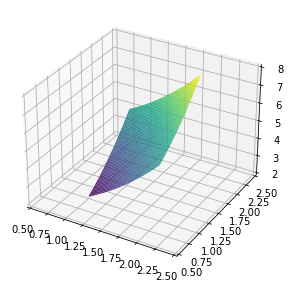

In [29]:
from sympy.plotting import plot3d
plot3d(x1**2+x2**2, (x1,1,2), (x2,1,2), xlim = (0.5,2.5), ylim = (0.5,2.5))

### Aufgabe 12

Berechnen Sie das Integral $\int_Bf(r,\varphi)drd\varphi$ über dem angegebenen Bereich in Polarkoordinaten:
$$
f(r, \varphi) =\varphi^2\cosh(r), B=\{(r,\varphi)\in \mathbb{R}^2|0\leq r \leq
2, \pi/4\leq \varphi \leq \pi/2\}
$$

$$
    \int_{\pi/4}^{\pi/2} {\int_0^2 {\varphi^2\cosh{(r)} r dr} d\varphi}  \\
    = \int_{\pi/4}^{\pi/2} {\varphi^2 \left(r\sinh{(r)}- \cosh{(r)} \right) \bigg|_0^2 d\varphi} \\
    = \int_{\pi/4}^{\pi/2} {\varphi^2 \left(2\sinh{(2)}- \cosh{(2)} + 1 \right)  d\varphi} \\
    = \left(2\sinh{(2)}- \cosh{(2)} + 1 \right) \frac{\varphi^3}{3} \bigg|_{\pi/4}^{\pi/2} \\
    = \left(2\sinh{(2)}- \cosh{(2)} + 1 \right) \frac{\pi^3}{3} \left( \frac{1}{8} - \frac{1}{64} \right) \\
    = \frac{7\pi^3\left(2\sinh{(2)}- \cosh{(2)} + 1 \right)}{192}
$$

In [30]:
r, phi = symbols('r phi', positive=True)
i = Integral(Integral(phi**2*cosh(r)*r,(r,0,2)), (phi, pi/4, pi/2));i

Integral(phi**2*r*cosh(r), (r, 0, 2), (phi, pi/4, pi/2))

In [31]:
i.doit().simplify()

7*pi**3*(-cosh(2) + 1 + 2*sinh(2))/192

In [32]:
i.doit().n(5)

5.0774